# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:
- Email:
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

"""import warnings
warnings.filterwarnings('ignore')"""

"import warnings\nwarnings.filterwarnings('ignore')"

### Menyiapkan data yang akan digunakan

In [2]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv"
df = pd.read_csv(url)

## Data Understanding

In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeId** - Employee Identifier
* **Attrition** - Did the employee attrition? (0=no, 1=yes)
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Daily salary
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Hourly salary
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly salary
* **MonthlyRate** - Mounthly rate
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager


**Acknowledgements**
https://www.ibm.com/communities/analytics/watson-analytics-blog/watson-analytics-use-case-for-hr-retaining-valuable-employees/

In [5]:
print("Jumlah duplikat pada data :", df.duplicated().sum())

Jumlah duplikat pada data : 0


In [6]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


Terdapat 412 missing value pada kolom attrition

In [7]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


### Data Cleaning

In [8]:
#drop kolom kosong
df = df.dropna()

Kita handle missing vakue dengan mendropnya

In [9]:
df.shape

(1058, 35)

Data menjadi berukuran 1058 baris dan 35 kolom setelah dilakukan cleaning

In [10]:
df.to_csv("employed_data_clean.csv", index =False)

Save data yang sudah clean untuk pembuatan dashboard

### EDA

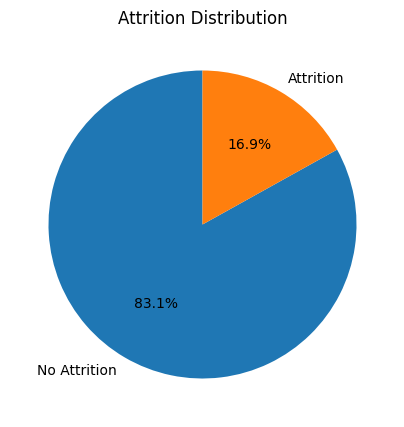

In [11]:
#piechart
plt.figure(figsize=(5,5))
labels = ['No Attrition',"Attrition"]
plt.pie(df['Attrition'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Attrition Distribution')
plt.show()

Sebanyak 16,9% karyawan keluar dari perusahaan

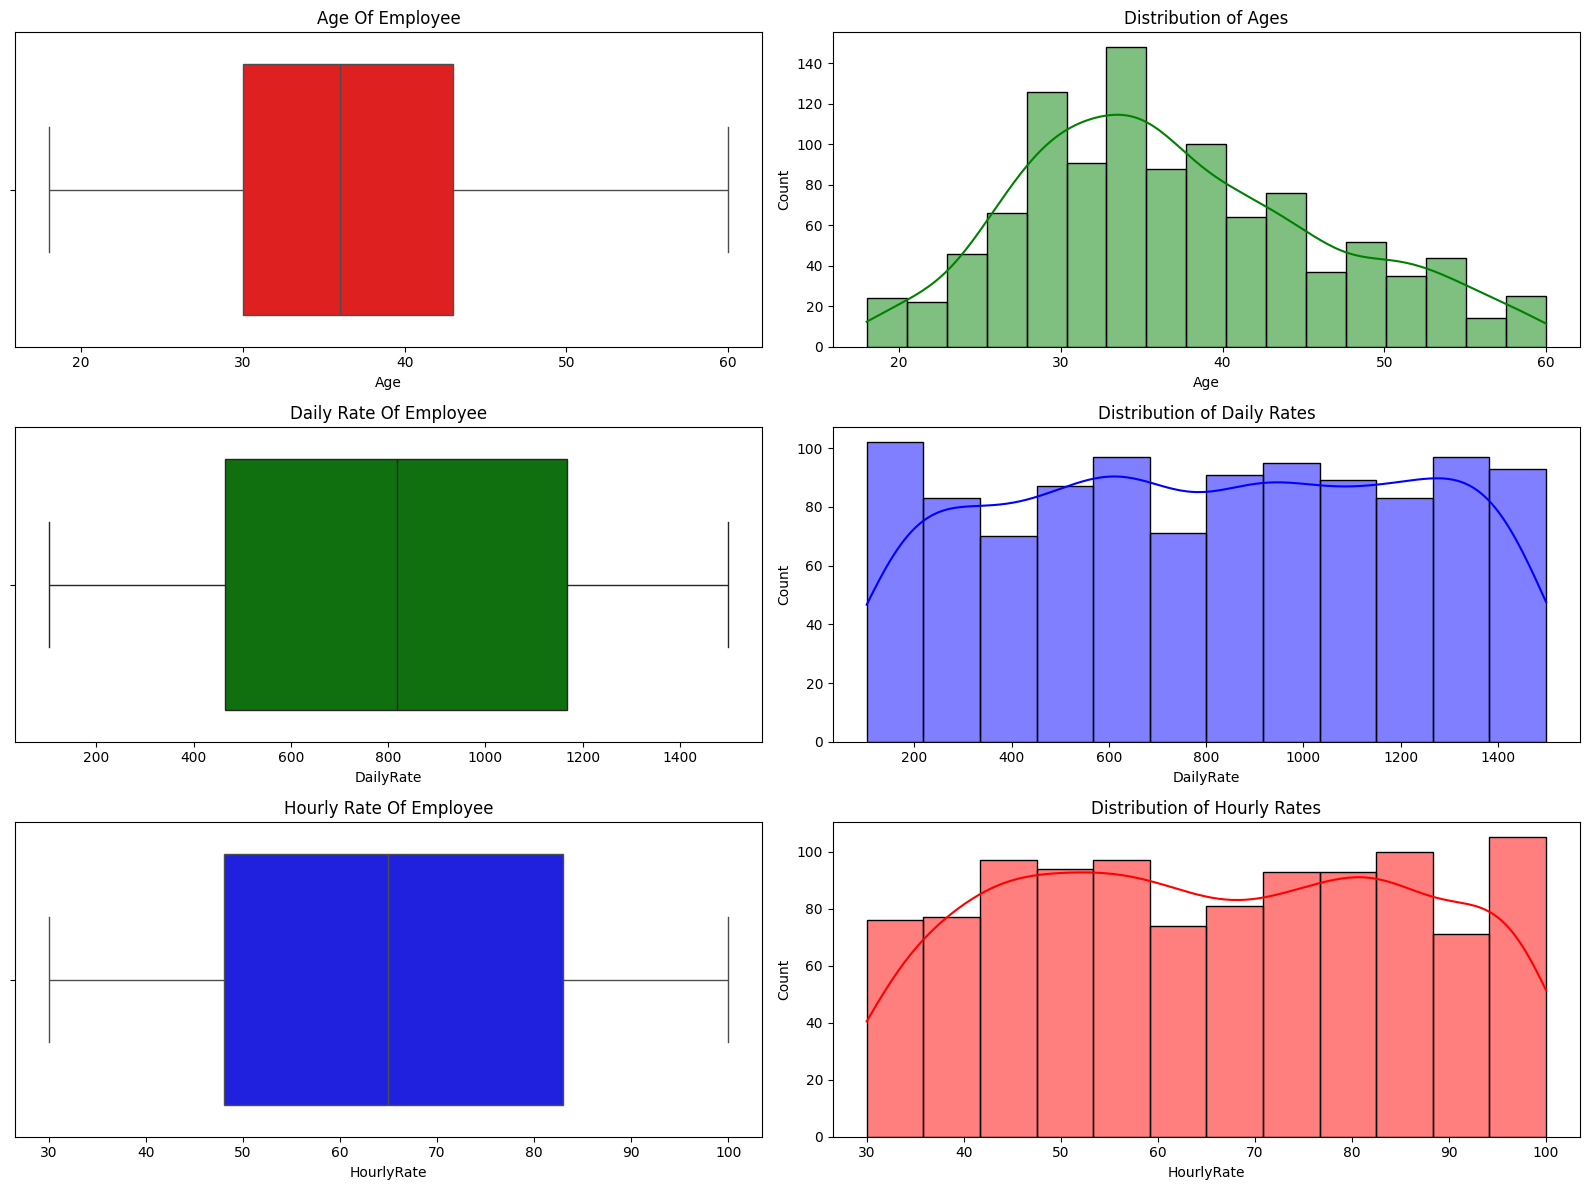

In [12]:
fig1, axes1 = plt.subplots(3, 2, figsize=(16, 12))
sns.boxplot( ax=axes1[0,0], x = df['Age'], color='r')
axes1[0,0].set_title('Age Of Employee')
sns.histplot(ax=axes1[0,1], x = df['Age'],kde = True, color='g')
axes1[0,1].set_title('Distribution of Ages')
sns.boxplot(ax=axes1[1,0], x = df['DailyRate'], color='g')
axes1[1,0].set_title('Daily Rate Of Employee')
sns.histplot(ax=axes1[1,1], x = df['DailyRate'],kde = True, color='b')
axes1[1,1].set_title("Distribution of Daily Rates")
sns.boxplot(ax=axes1[2,0], x = df['HourlyRate'], color='b')
axes1[2,0].set_title('Hourly Rate Of Employee')
sns.histplot(ax=axes1[2,1], x = df['HourlyRate'],kde = True, color='r')
axes1[2,1].set_title("Distribution of Hourly Rates")
plt.tight_layout()
plt.show()

PAda Variabel diatas tidak terdapat nilai outlier dan distribusinya Normal

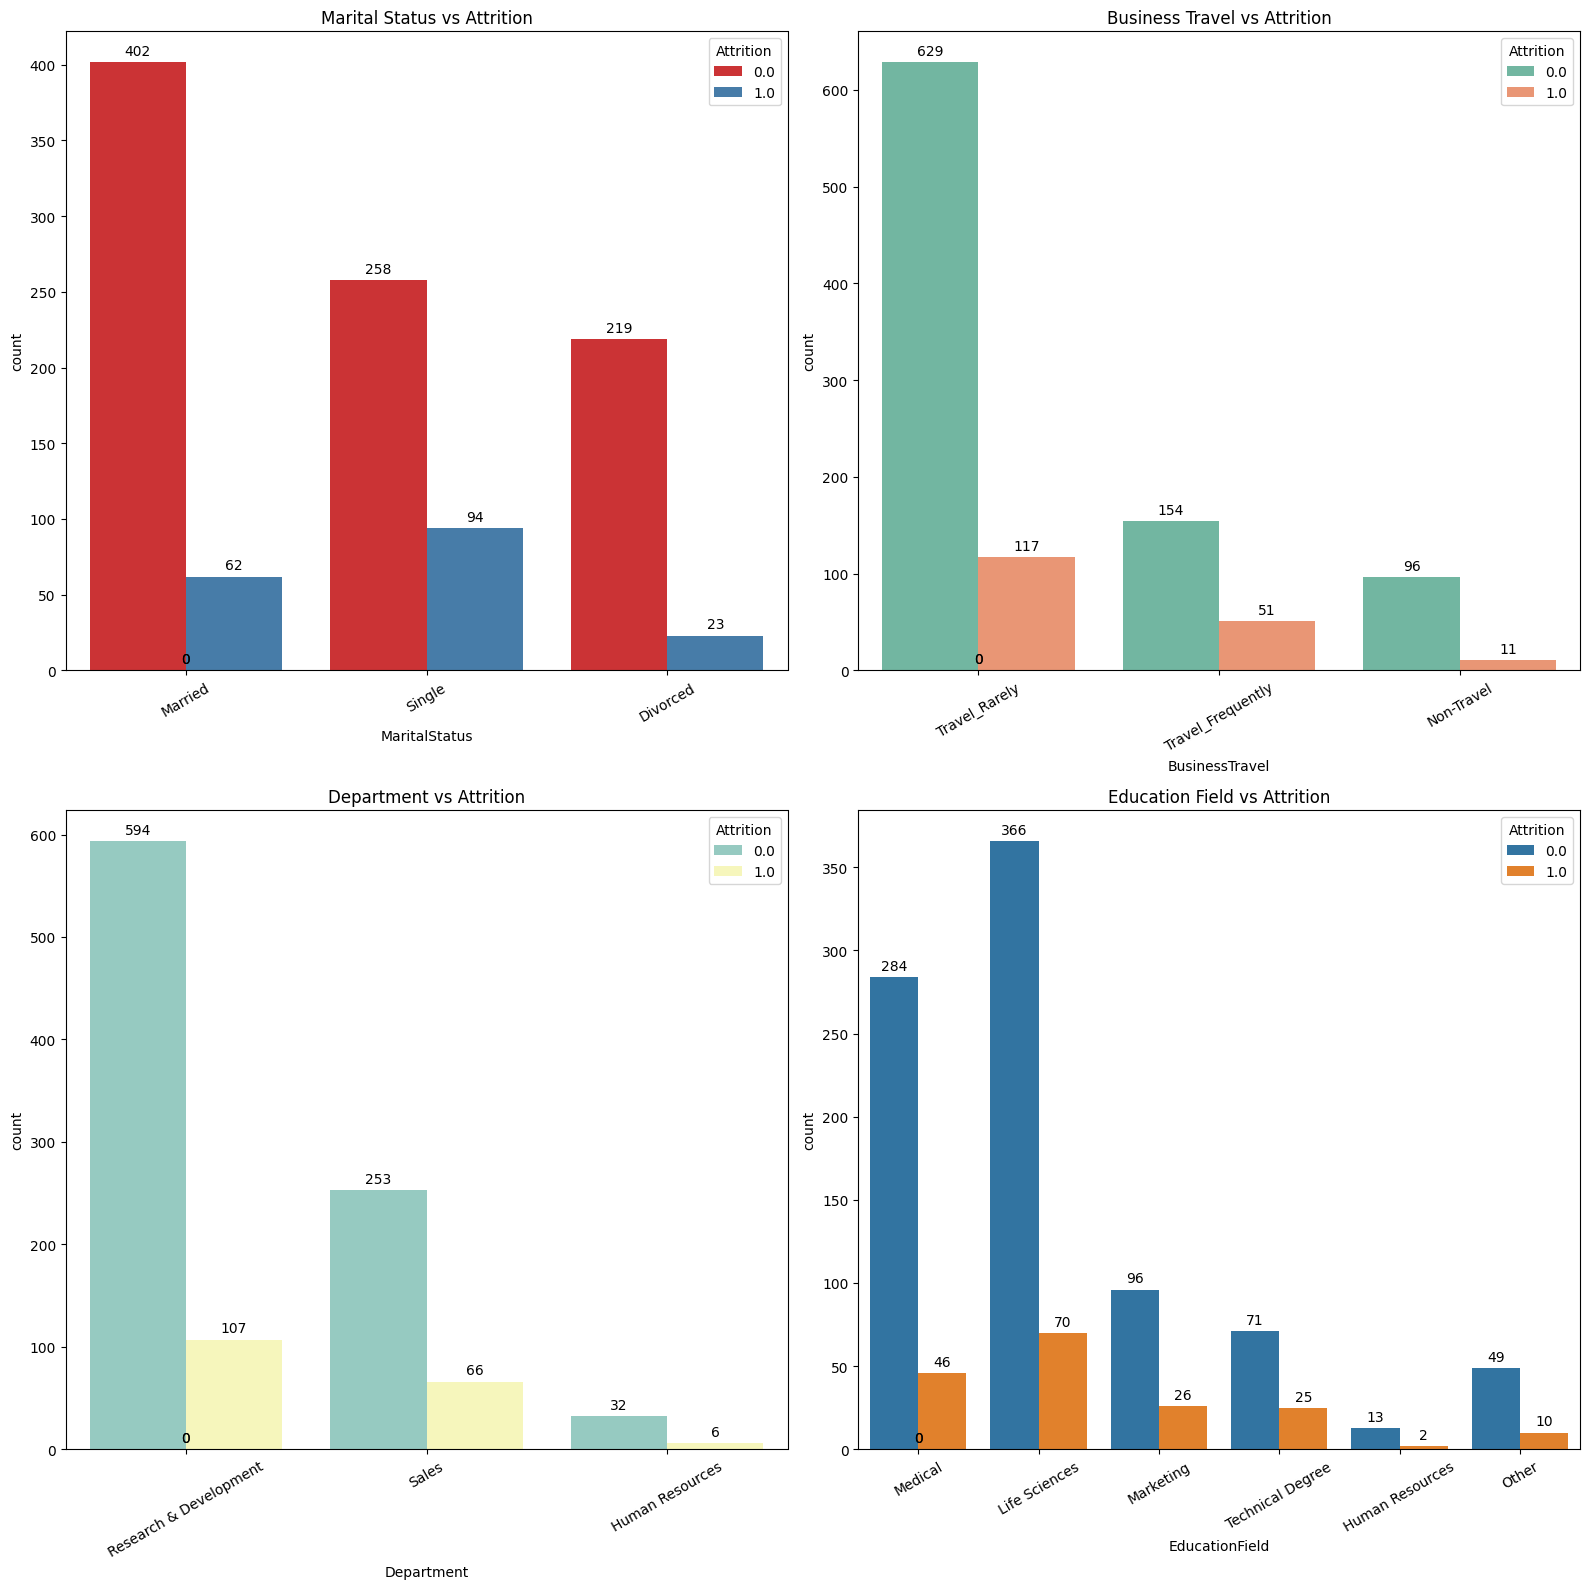

In [13]:
# Figure 1 (2x2 Subplots)
fig2a, axes2a = plt.subplots(2, 2, figsize=(16, 16))

# Plot 1 - Attrition vs Marital Status
sns.countplot(ax=axes2a[0,0], x='MaritalStatus', hue='Attrition', data=df, palette='Set1')
axes2a[0,0].set_title('Marital Status vs Attrition')
axes2a[0,0].tick_params(axis='x', rotation=30)

# Plot 2 - Attrition vs Business Travel
sns.countplot(ax=axes2a[0,1], x='BusinessTravel', hue='Attrition', data=df, palette='Set2')
axes2a[0,1].set_title('Business Travel vs Attrition')
axes2a[0,1].tick_params(axis='x', rotation=30)

# Plot 3 - Attrition vs Department
sns.countplot(ax=axes2a[1,0], x='Department', hue='Attrition', data=df, palette='Set3')
axes2a[1,0].set_title('Department vs Attrition')
axes2a[1,0].tick_params(axis='x', rotation=30)

# Plot 4 - Attrition vs Education Field
sns.countplot(ax=axes2a[1,1], x='EducationField', hue='Attrition', data=df, palette='tab10')
axes2a[1,1].set_title('Education Field vs Attrition')
axes2a[1,1].tick_params(axis='x', rotation=30)

for ax in axes2a.flat:
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=10,
            color='black',
            xytext=(0, 3),
            textcoords='offset points'
        )
plt.tight_layout()
plt.show()

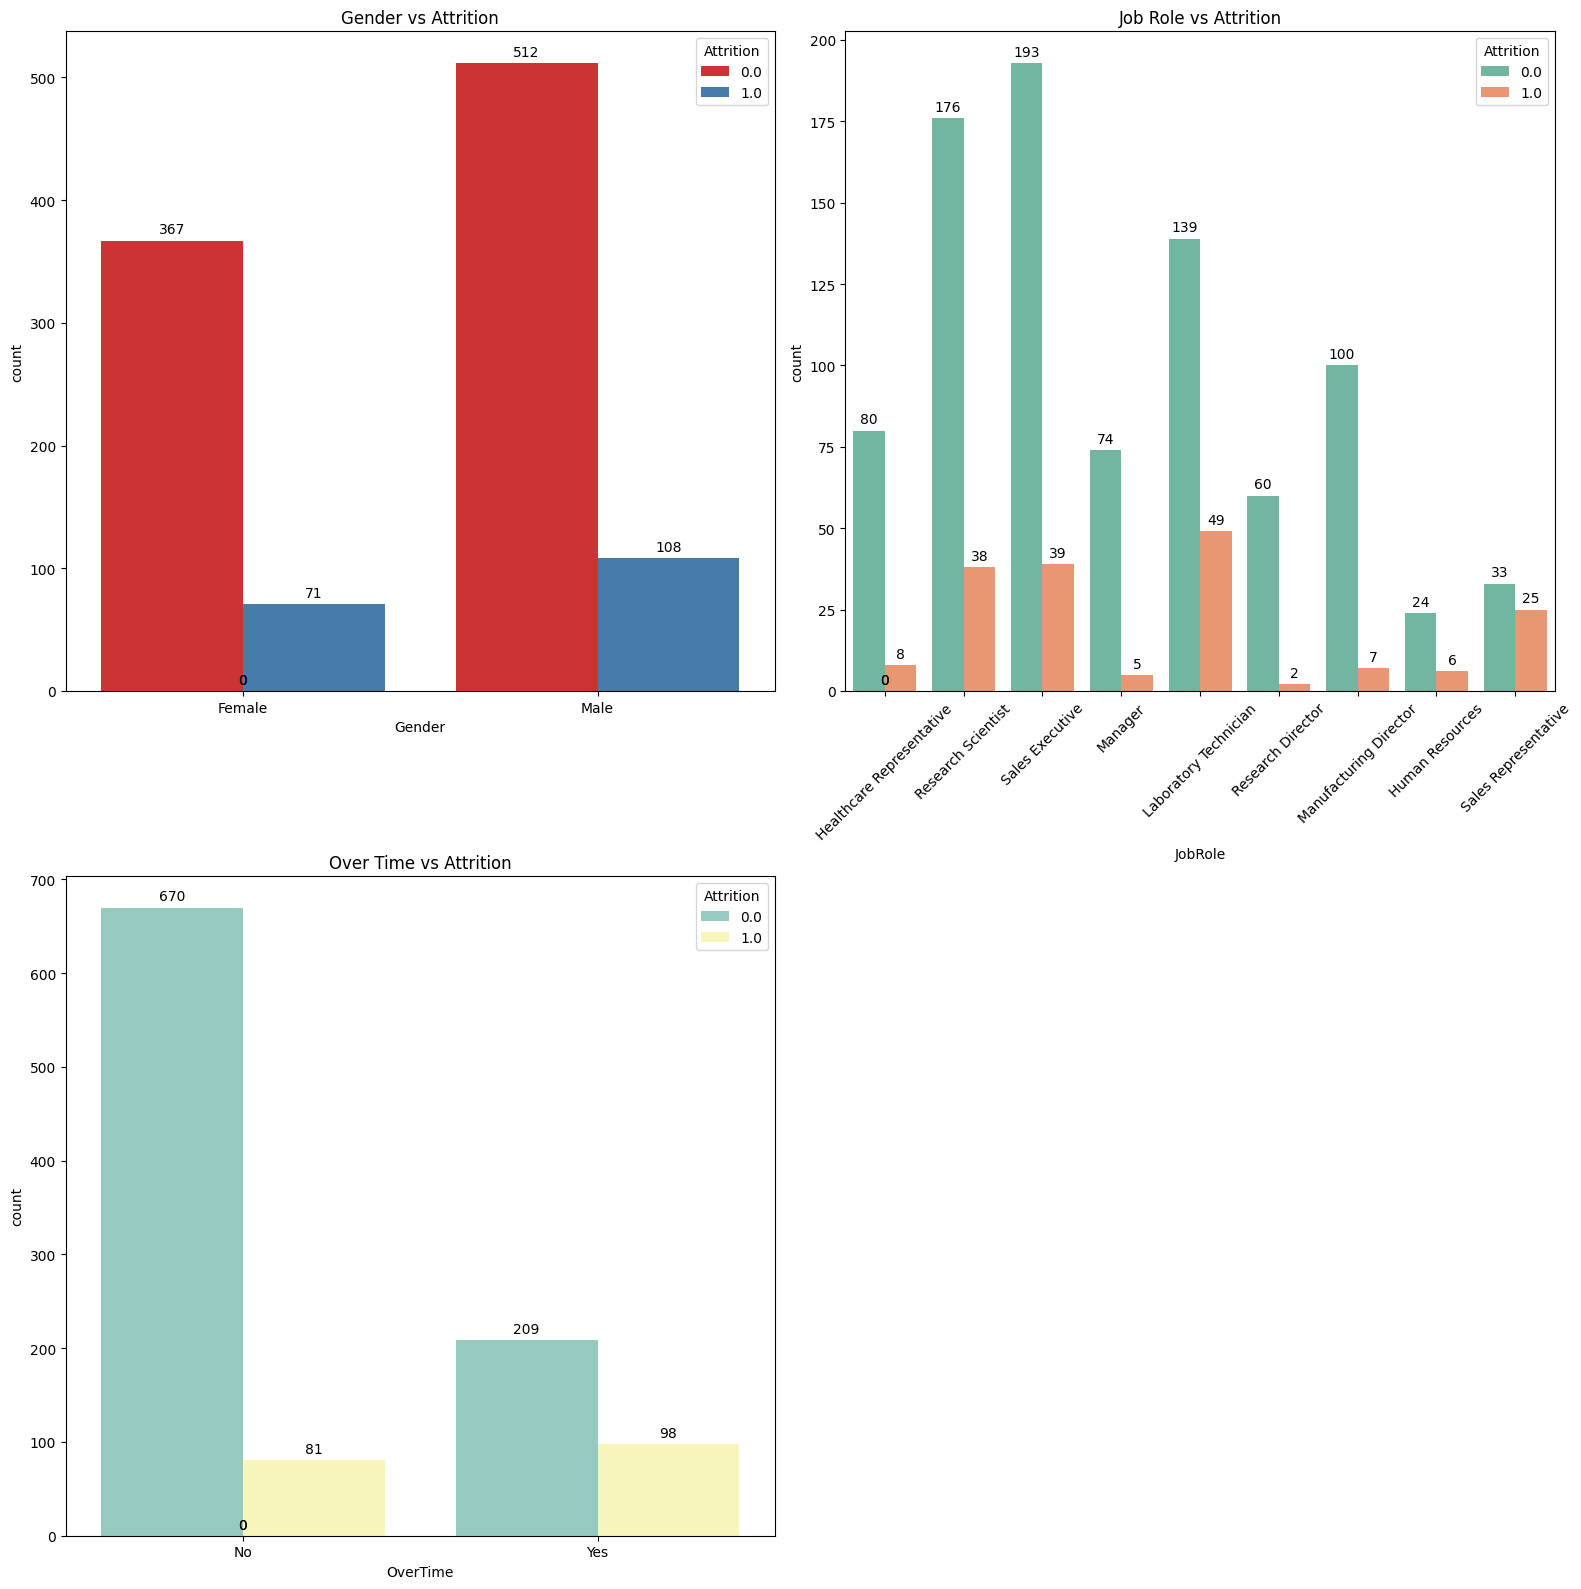

<Figure size 640x480 with 0 Axes>

In [14]:
# Figure 2 (2x2 Subplots)
fig2b, axes2b = plt.subplots(2, 2, figsize=(16, 16))

# Plot 5 - Attrition vs Gender
sns.countplot(ax=axes2b[0,0], x='Gender', hue='Attrition', data=df, palette='Set1')
axes2b[0,0].set_title('Gender vs Attrition')

# Plot 6 - Attrition vs Job Role
sns.countplot(ax=axes2b[0,1], x='JobRole', hue='Attrition', data=df, palette='Set2')
axes2b[0,1].set_title('Job Role vs Attrition')
axes2b[0,1].tick_params(axis='x', rotation=45)

# Plot 7 - Attrition vs Over Time
sns.countplot(ax=axes2b[1,0], x='OverTime', hue='Attrition', data=df, palette='Set3')
axes2b[1,0].set_title('Over Time vs Attrition')

# Matikan axes yang tidak digunakan
axes2b[1,1].axis('off')

for ax in axes2b.flat:
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=10,
            color='black',
            xytext=(0, 3),
            textcoords='offset points'
        )
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

Attrion terbanyak berasal dari Karyawan dengan:
- Status pernikahan: Single
- Travel Bisnis : Rarely
- Departemen ; RnD
- Eduction Field : Life Sciences
- Gender : Male
- Jobrole : Laboratory Techinician
- Overtime : Yes



### Cek korelasi

In [15]:
encoded_df = df.copy()
#encode fitur
le  = LabelEncoder()
categorical_columns = encoded_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    encoded_df[column] = le.fit_transform(encoded_df[column])


Fitur kategorikal diencode agar dapat melihat korelasinya dengan fitur attrition

In [16]:
# Hitung korelasi ke fitur target
target_corr = encoded_df.corr()[['Attrition']].sort_values(by='Attrition', ascending=False)
target_corr = target_corr.drop('Attrition')
target_corr

,Attrition
OverTime,0.255856
MaritalStatus,0.177989
DistanceFromHome,0.078074
Department,0.060796
JobRole,0.056146
EducationField,0.040568
NumCompaniesWorked,0.037429
MonthlyRate,0.023299
Gender,0.015887
PerformanceRating,0.007755


<ipython-input-17-6a0de1fe7086>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr['Attrition'], y=target_corr.index, palette='coolwarm')


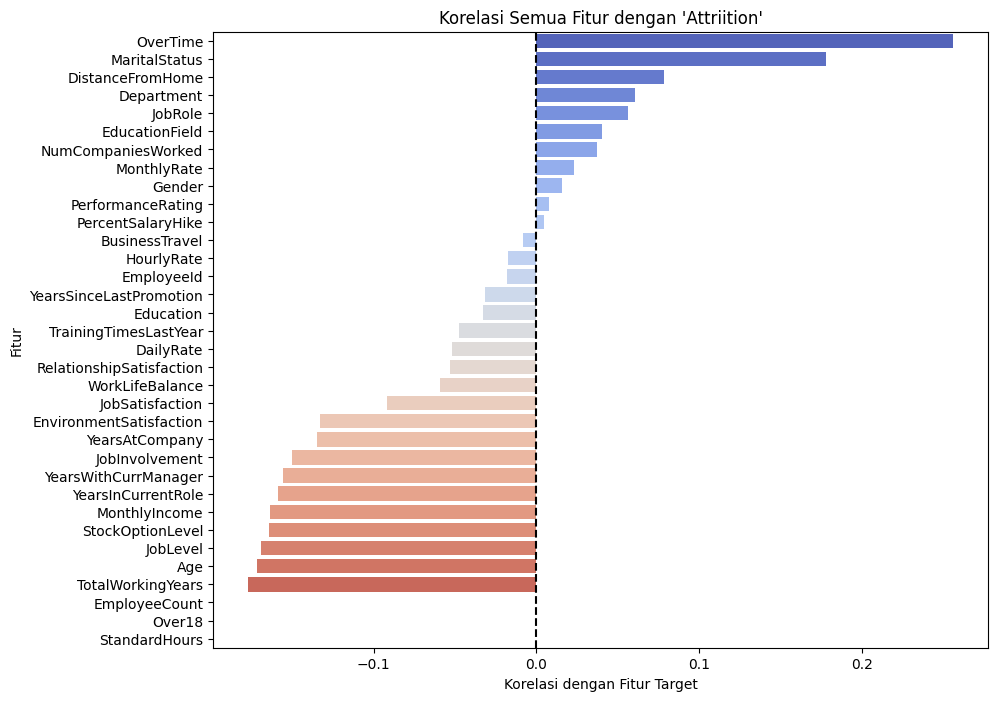

In [17]:



# Plot bar horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr['Attrition'], y=target_corr.index, palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Korelasi dengan Fitur Target")
plt.ylabel("Fitur")
plt.title("Korelasi Semua Fitur dengan 'Attriition'")
plt.show()

Fitur teratas yang berkorelasi positif dengan Attrition:

1. OverTime (0.255856)
  
  OverTime atau lembur menjadi faktor yang paling berpengaruh terhadap attrition. Hal ini menunjukan bahwa semakin tinggi frekuensi karyawan melakukan lembur semakin tinggi pula kemungkina karyawan keluar dari perusahaann

2. MaritalStatus	(0.177989)

  Lalu yang kedua ada Marital Status, walaupun lebih rendah dan tidak terlalu besar nilai korelasinya akan tetapi status pernikahan karyawan sangat berpengaruh terhadap attrition

Faktor teratas yang berkorelasi negatif dengan Attrition:

1. TotalWorkingYear (-0.177137)

  Disisi lain jumlah tahun bekerja memiliki berbanding terbalik dengan attrition karyawan. Karyawan yang telah memiliki pengalaman bekerja lebih lama cenderung untuk tidak meninggalkan perusahaan

2. Age (-0.172067)

  Karyawan dengan umur lebih tua cenderung tidak meninggalkan perusahaan

## Data Preparation / Preprocessing

### Feature selection

In [18]:
feature_selected = ["TotalWorkingYears","Age","JobLevel","OverTime","MaritalStatus","Attrition"]
df_selected = encoded_df[feature_selected]
#df_selected = encoded_df.copy()
df_selected.head()

,TotalWorkingYears,Age,JobLevel,OverTime,MaritalStatus,Attrition
1,15,37,2,0,1,1.0
2,18,51,1,1,1,1.0
3,23,42,4,0,1,0.0
6,6,40,2,1,1,0.0
7,24,55,5,1,1,1.0


Fitur dengan nilai korelasi paling mendekati 1 dan -1 dipilih untuk modelling

### Standarisasi Nilai numerik

In [19]:
# Initialize MinMaxScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df_selected[['TotalWorkingYears', 'Age']] = scaler.fit_transform(df_selected[['TotalWorkingYears', 'Age']])

# Display the updated DataFrame
df_selected.head()


<ipython-input-19-0b3bb0f5f779>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[['TotalWorkingYears', 'Age']] = scaler.fit_transform(df_selected[['TotalWorkingYears', 'Age']])


,TotalWorkingYears,Age,JobLevel,OverTime,MaritalStatus,Attrition
1,0.444831,-0.005929,2,0,1,1.0
2,0.819240,1.482487,1,1,1,1.0
3,1.443254,0.525648,4,0,1,0.0
6,-0.678394,0.313018,2,1,1,0.0
7,1.568057,1.907749,5,1,1,1.0


### Splitting dataset

In [20]:
X= df_selected.drop(columns=['Attrition'])
y= df_selected['Attrition']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [22]:
# 1. Logistic Regression
Logres = LogisticRegression(
    penalty='l2',
    C=0.5,
    solver='liblinear',
    max_iter=2000,
    random_state=42
).fit(X_train, y_train)

# 2. Decision Tree
dt = DecisionTreeClassifier(
    max_depth=7,
    min_samples_split=15,
    class_weight='balanced',
    random_state=42
).fit(X_train, y_train)

# 3. Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
).fit(X_train, y_train)

# 4. SVM

SVM = SVC(kernel='rbf', C=1, gamma=0.1, random_state=42).fit(X_train, y_train)

Digunakan model logistic regression, decision tree, random fores dan Suport Vector Machine untuk menemukan model yang memiliki nilai akurasi terbaik

## Evaluation

In [23]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro'),

    }
    return results

result = {
    'Logistic Regression': evaluate_model(Logres, X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test),
    'Random Forest': evaluate_model(rf, X_test, y_test),
    'SVM': evaluate_model(SVM, X_test, y_test)

}

summary = pd.DataFrame(columns=[ 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in result.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']

    })

# Konversi daftar kamus ke DataFrame
summary = pd.DataFrame(rows)

# Tampilkan DataFrame
summary.head()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.839623,0.810071,0.583963,0.600621
1,Decision Tree,0.707547,0.620873,0.681784,0.623855
2,Random Forest,0.778302,0.637675,0.645694,0.641363
3,SVM,0.816038,0.408019,0.500000,0.449351


Diperoleh model Logistic Regression sebagai model terbaik pada kasus ini

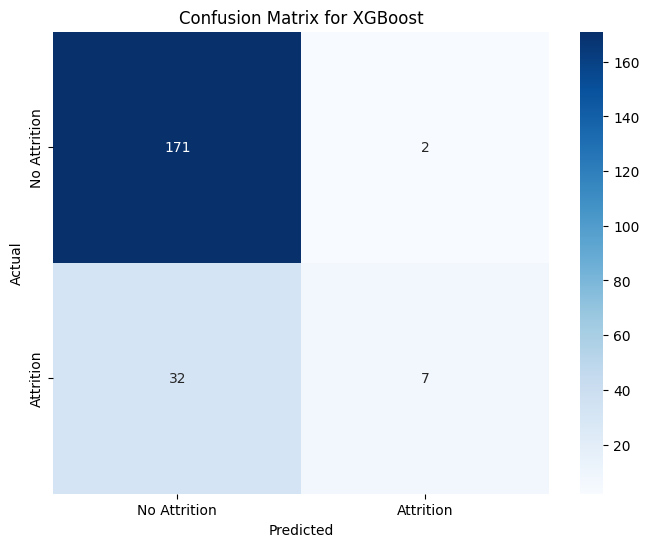

In [24]:


y_pred = Logres.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()


In [25]:
best_model = Logres
# Save model dan scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Deployment

In [26]:

# Load model
loaded_model = joblib.load('best_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

df_dummy = pd.DataFrame({
    "TotalWorkingYears": [13],
    "Age": [32],
    "OverTime": [1],
    "MaritalStatus": [1],
    "JobLevel": [3],
})

# Scaling dummy input
df_dummy_scaled = df_dummy.copy()
df_dummy_scaled[["TotalWorkingYears","Age"]] = loaded_scaler.transform(df_dummy[["TotalWorkingYears","Age"]])
df_dummy_scaled = df_dummy_scaled[['TotalWorkingYears', 'Age', 'JobLevel', 'OverTime', 'MaritalStatus']]

# Mapping hasil prediksi

mapping = {0: "Karyawan kemungkinan akan Tetap diperusahaan", 1: "Karyawan kemungkinan akan Pergi"}

# Prediksi menggunakan model
prediction = loaded_model.predict(df_dummy_scaled)
probabilities = loaded_model.predict_proba(df_dummy_scaled)

# Probabilitas untuk Tetap diperusahaan (Attrition: 0) dan Pergi dari perusahaan (Attrition: 1)
proba_stay = probabilities[:, 0] * 100
proba_leave = probabilities[:, 1] * 100

# Tampilkan hasil
print(f"Prediksi Attrition: {mapping[prediction[0]]}")
print(f"Probabilitas Tetap diperusahaan: {proba_stay[0]:.2f}%")
print(f"Probabilitas Pergi dari perusahaan: {proba_leave[0]:.2f}%")

Prediksi Attrition: Karyawan kemungkinan akan Tetap diperusahaan
Probabilitas Tetap diperusahaan: 78.45%
Probabilitas Pergi dari perusahaan: 21.55%


In [27]:
!pip freeze  > requirements.txt